#id: puddleworld-v0

Implementation of Q learning

Direction considers as:
           NORTH
            ^
            |
            |
WEST <------ ------>EAST
            |
            |
            ~
          SOUTH

In [1]:
import gym
import gym_grid_puddle_world
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_ploicy(ploicy_matrix, goal_position):
    
    img2 = plt.imread("im2.png")
    img3 = plt.imread("im3.png")
    img4 = plt.imread("im4.jpeg")
    img5 = plt.imread("im5.png")

    # up = arrow(0.5, .1, 0, 0.3,  width = .1, facecolor = 'black') ====   0
    # down = arrow(0.5, .9, 0, -.3,  width = .1, facecolor = 'black') ==== 3
    # right = arrow(0.1, .5, 0.3, 0,  width = .1, facecolor = 'black') ==== 1
    # left = arrow(0.9, .5, -0.3, 0,  width = .1, facecolor = 'black') ==== 2


    fig, axes = plt.subplots(nrows = 12, ncols = 12, figsize=(10,10))
    plt.subplots_adjust( wspace=0, hspace=0)
    p =1
    for i in range(len(axes)):
        for j in range(len(axes[0])):

            axes[i,j].set_facecolor('white')
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            if 1<i<9 and 2<j<9:
                 axes[i,j].set_facecolor('silver')
            if 2<i<8 and 3<j<8:
                 axes[i,j].set_facecolor('dimgray')
            if 3<i<7 and 4<j<7:
                 axes[i,j].set_facecolor('black')
            if (i == (6) or i == 5) and j == 6 :
                axes[i,j].set_facecolor('dimgray')
            if (i == (6) or i == 7) and j == 7 :
                axes[i,j].set_facecolor('silver')
            if (i == (7) or i == 8) and j == 8 :
                axes[i,j].set_facecolor('white')
            if i in [5,6,10,11] and j ==0:

                axes[i,j].set_facecolor('blue')
            if i == 0 and j == 11 and goal_position == 0:
                axes[i,j].imshow(img3)
            if i == 2 and j == 9 and goal_position == 1:
                axes[i,j].imshow(img4)
            if i == 6 and j == 7 and goal_position == 2:
                axes[i,j].imshow(img5)

    #         if i not in [0,2,6] and j not in [11,9,7]:
            p = ploicy_matrix[i,j]
            if p == 0:
                axes[i,j].arrow(0.5, .1, 0, 0.3,  width = .1, facecolor = 'green')

            elif p ==1 :
                axes[i,j].arrow(0.1, .5, 0.3, 0,  width = .1, facecolor = 'green')
            elif p==2:
                axes[i,j].arrow(0.9, .5, -0.3, 0,  width = .1, facecolor = 'green')
            elif p == 3:
                axes[i,j].arrow(0.5, .9, 0, -.3,  width = .1, facecolor = 'green')

    plt.show()


In [6]:
class Qlearning:
    
    def epsilon_action(self,environment, Q_values, current_state,epsilon):
        if np.random.uniform(0,1) < epsilon:
            action = environment.take_random_action()
            
        else:
            action = np.argmax(Q_values[:,current_state[0],current_state[1]])
           
        return action
    
    def test_action(self,environment, Q_values, current_state):
        action = np.argmax(Q_values[:,current_state[0],current_state[1]])
        return action
    
    def update_Q_values(self, alpha, gamma,current_state, current_action, reward_generated, value, Q_values):
        error = reward_generated + (gamma*value) - Q_values[current_action][current_state[0],current_state[1]]
        Q_values[current_action][current_state[0],current_state[1]] = Q_values[current_action][current_state[0],current_state[1]] + alpha*error
        
        return Q_values
    
    def run_episode(self, environment, epsilon, gamma, alpha, goal_position, Q_values):
        
        current_state = environment.reset()
        
        step_count = 0
        total_reward = 0
        i =0
        while i<1000:
            
            current_action = self.epsilon_action(environment,Q_values,current_state, epsilon)
            next_state, reward = environment.step(current_state,current_action )
           
            value = np.max(Q_values[:,next_state[0],next_state[1]])
            step_count = step_count +1
            total_reward = total_reward + reward
            Qvalue = self.update_Q_values(alpha, gamma,current_state, current_action, reward,value,  Q_values)
            if next_state == goal_position:
#                 print("bro")
                break
            current_state = next_state
            i +=1
            
        return step_count, total_reward, Qvalue
    
    def test(self,environment, epsilon, Q_values, goal_position):
        print("goal",goal_position)
        step_count = 0
        total_reward = 0
        state_collection = []
        current_state = environment.reset()
        state_collection.append(current_state)
        print(current_state)
        current_action = self.test_action(environment,Q_values,current_state) 
        while True:
            
#             print(current_state)
            step_count = step_count + 1
            current_state, reward = environment.step(current_state,current_action )
            current_action = self.test_action(environment,Q_values,current_state) 
            total_reward = total_reward + reward 
            state_collection.append(current_state)
            if current_state == goal_position:
                break
        return step_count, total_reward, state_collection
                
    

/home/unigalso/miniconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


ewdwqedw [[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1 -1 -1 -1 -1 -1  0  0  0]
 [ 0  0  0 -1 -2 -2 -2 -2 -1  0  0  0]
 [ 0  0  0 -1 -2 -3 -3 -2 -1  0  0  0]
 [ 0  0  0 -1 -2 -3 -2 -2 -1  0  0  0]
 [ 0  0  0 -1 -2 -3 -2 10 -1  0  0  0]
 [ 0  0  0 -1 -2 -2 -2 -1  0  0  0  0]
 [ 0  0  0 -1 -1 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]
experiment 0
experiment 1
experiment 2
experiment 3
experiment 4
experiment 5
experiment 6
experiment 7
experiment 8
experiment 9
experiment 10
experiment 11
experiment 12
experiment 13
experiment 14
experiment 15
experiment 16
experiment 17
experiment 18
experiment 19
experiment 20
experiment 21
experiment 22
experiment 23
experiment 24
experiment 25
experiment 26
experiment 27
experiment 28
experiment 29


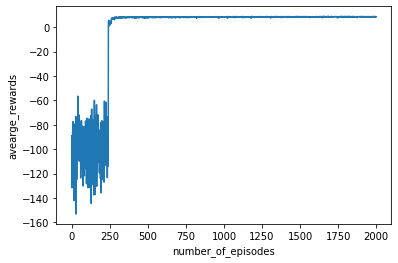

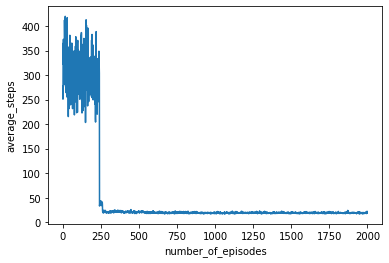

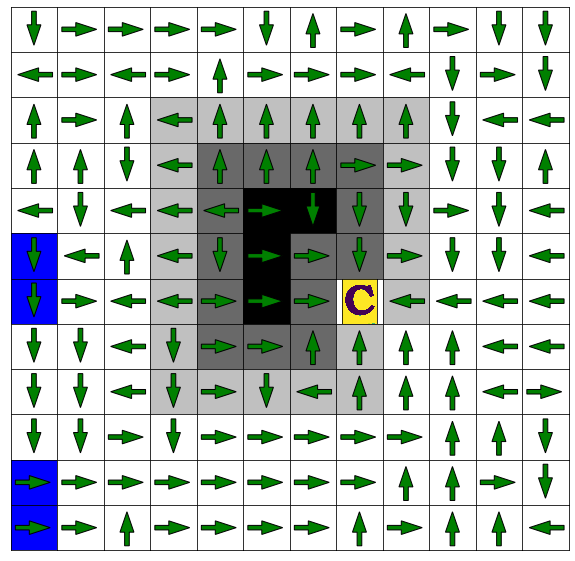

In [20]:

number_of_episodes = 2000
gamma = 0.9
alpha = 0.5

experiments = 30
goal_position = 'C'
goal_dictionary = {'A':0, 'B':1, 'C':2}
environment = gym.make('puddleworld-v0')
sarsa_obj = Qlearning()
rewards = np.zeros((experiments, number_of_episodes))
steps =  np.zeros((experiments, number_of_episodes))
p = environment.setting_goal(goal_position)
print("ewdwqedw",environment.grid_world)
for i in range(experiments):
    epsilon = 1
    decay_count = 0
    Q_values = np.random.rand(environment.action_space.n, environment.observation_space.shape[0], environment.observation_space.shape[1])
    for j in range(number_of_episodes):
        step_count, total_reward, Q = sarsa_obj.run_episode( environment, epsilon, gamma, alpha, p, Q_values)
        rewards[i,j] = total_reward
        steps[i,j] = step_count
        if j%(number_of_episodes/100) == 0  and j>(number_of_episodes/10):
            decay_count +=1
            epsilon = epsilon/(decay_count)
    print("experiment",i)

avearge_rewards = np.mean(rewards,0)
average_steps = np.mean(steps,0)
plt.plot(np.arange(number_of_episodes), avearge_rewards)
plt.xlabel("number_of_episodes")
plt.ylabel("avearge_rewards")
plt.show()
plt.close()
plt.plot(np.arange(number_of_episodes), average_steps)
plt.xlabel("number_of_episodes")
plt.ylabel("average_steps")
plt.show()
plt.close()
best_action = np.zeros((environment.observation_space.shape[0],environment.observation_space.shape[1]))
for i in range(environment.observation_space.shape[0]):
    for j in range(environment.observation_space.shape[1]):
        best_action[i,j] = np.argmax(Q[:,i,j])
plot_ploicy(best_action,goal_dictionary[goal_position])

newline = '##############################################################'   
f=open("LogfileQlearning", "a+")    
for i in range(5):
    f.write("alpha %s\t" %(newline))
    f.write("number_of_episodes %d\t " %(number_of_episodes))
    f.write("gamma %f\t " %(gamma))
    f.write("alpha %f\t" %(alpha))
    f.write("alpha %s\t" %(goal_position))
    f.write("alpha %s\d" %(experiments))
